In [1]:
###importing the libraries
import numpy as np 
import pandas as pd 
from numpy import math 
  


from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'numpy'

In [ ]:
##importing the dataset 
dataset = pd.read_csv("50_Startups.csv")

In [ ]:
dataset.shape

(50, 5)

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


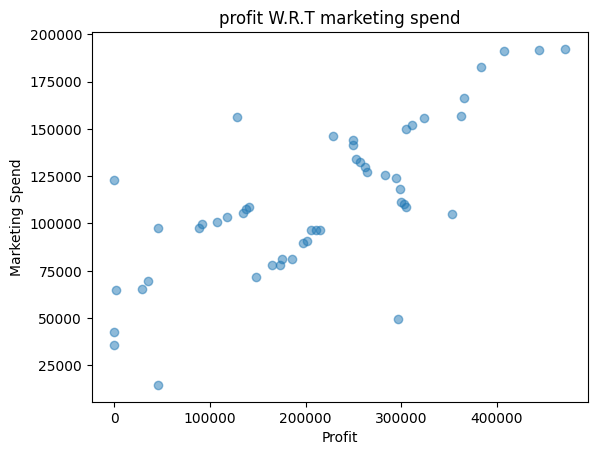

In [ ]:
##relation of profit with marketing Spend 
plt.scatter(dataset['Marketing Spend'] , dataset['Profit'] , alpha=0.5)
plt.title("profit W.R.T marketing spend")
plt.xlabel("Profit")
plt.ylabel("Marketing Spend")

plt.show()

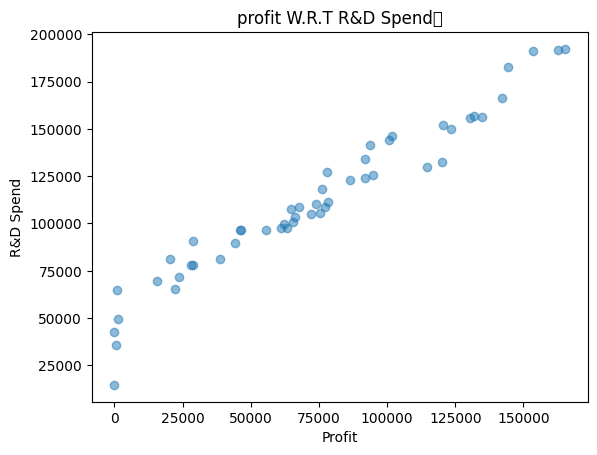

In [ ]:
##relation of profit with R&D Spend
plt.scatter(dataset['R&D Spend'] , dataset['Profit'] , alpha=0.5)
plt.title("profit W.R.T R&D Spend	")
plt.xlabel("Profit")
plt.ylabel("R&D Spend")

plt.show()

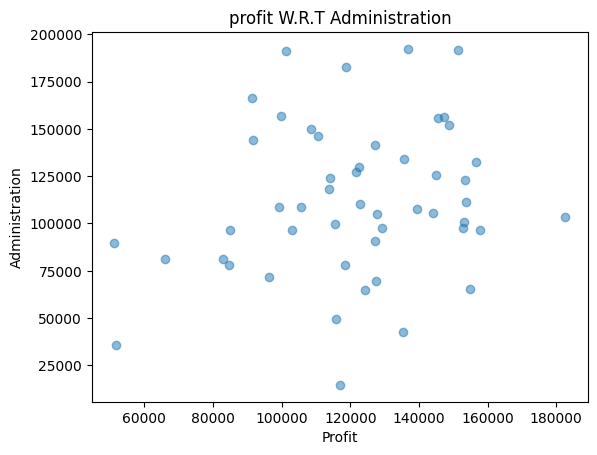

In [ ]:
##relation of profit with Administration Spend
plt.scatter(dataset['Administration'] , dataset['Profit'] , alpha=0.5)
plt.title("profit W.R.T Administration")
plt.xlabel("Profit")
plt.ylabel("Administration")

plt.show()

In [ ]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
##creating the dummy variable for categorical data
dataset['New York'] = np.where(dataset['State']=='New York' , 1,0)
dataset['California']= np.where(dataset['State']=='California',1,0)
dataset['Florida']=np.where(dataset['State']=='Florida' ,1,0)

#drop the original column state from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
#dependent variable
dep_var=dataset['Profit'].values

In [ ]:
dep_var.shape

(50,)

In [ ]:
#independent variable
ind_var=dataset.columns.tolist()

In [ ]:
ind_var.remove('Profit')


In [ ]:
ind_var

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'New York',
 'California',
 'Florida']

In [ ]:
#creating the datset of independent variables
X=dataset[ind_var].values
y=dataset['Profit'].values

In [ ]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
#splitting the data into  Training and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3 , random_state=42)


In [ ]:
#standardizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape



(35, 6)

In [ ]:
#fitting the Multiple linear regression to the training set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)


In [ ]:
y_pred.shape

(15,)

In [ ]:
accuracy=r2_score(y_test,y_pred)

In [ ]:
accuracy

0.9397108063355787